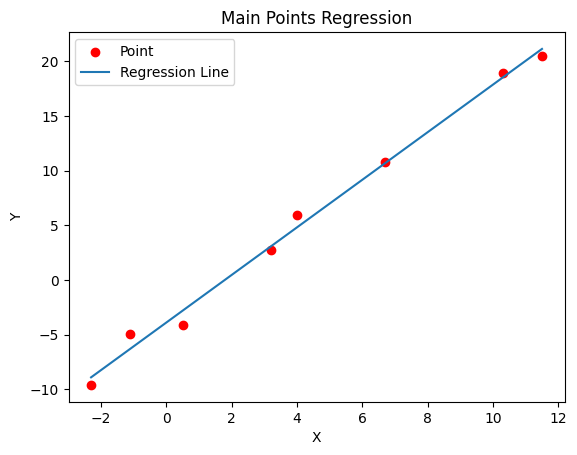

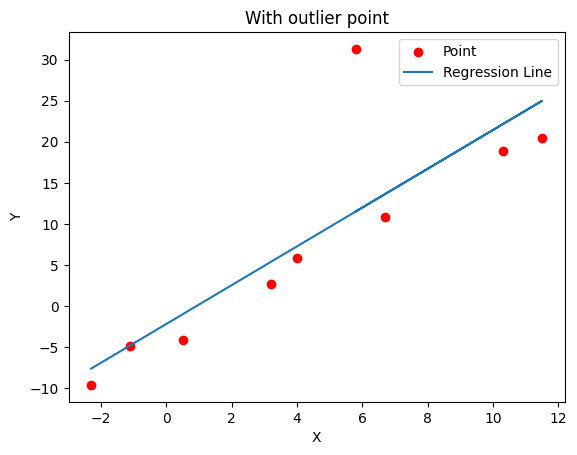

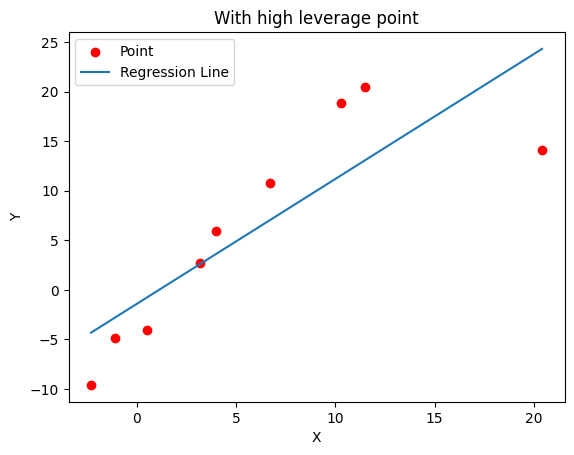

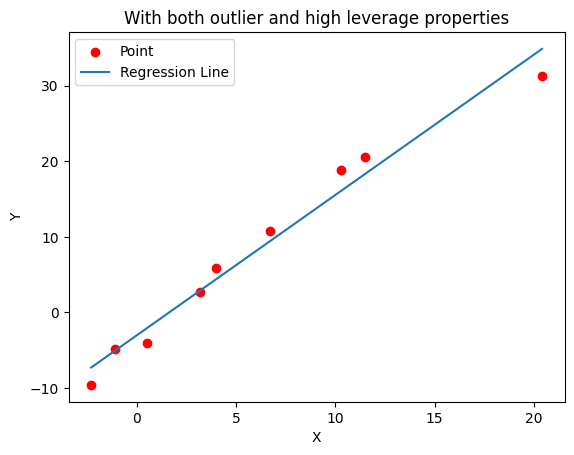

R2 for Main Points: 0.9931142293628097
R2 for outlier: 0.6943381680789323
R2 for high leverage: 0.7069879724740986
R2 for both properties: 0.9738367949787371


In [3]:
import matplotlib.pyplot as plt
import numpy as np
import random
def set_seed(seed):
    np.random.seed(seed)
    random.seed(seed)
set_seed(810109203)

def regression(x_main, y_main):
    mean_x = sum(x_main) / len(x_main)
    mean_y = sum(y_main) / len(y_main)
    cov = []
    for i in range(len(x_main)):
        cov.append((x_main[i] - mean_x) * (y_main[i] - mean_y))
    varX = []
    for i in range(len(x_main)):
        varX.append((x_main[i] - mean_x) ** 2)
    slope = sum(cov) / sum(varX)
    b = mean_y - slope * mean_x

    return slope, b

def calc_r(y_main, predict):
    _sum = sum(y_main)
    sst = []
    ssr = []
    num = len(y_main)
    for y in y_main:
        sst.append((y - _sum / num)**2)
    for i in range(num):
        ssr.append((y_main[i] - predict[i])**2)

    R = 1 - (sum(ssr) / sum(sst))

    return R

def calc(x_main, y_main, title):
    slope , b = regression(x_main, y_main)

    predict = []
    for a in x_main:
        predict.append((slope*a) + b)

    plt.scatter(x_main, y_main, label='Point',color = 'red')
    plt.plot(x_main, predict, label='Regression Line')
    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title(title)
    plt.legend()
    plt.show()

    R = calc_r(y_main, predict)

    return R



x_main = [-2.3, -1.1, 0.5, 3.2, 4.0, 6.7, 10.3, 11.5]
y_main = [-9.6, -4.9, -4.1, 2.7, 5.9, 10.8, 18.9, 20.5]


R_main = calc(x_main, y_main, 'Main Points Regression')


x_main.append(5.8)
y_main.append(31.3)


R_outlier = calc(x_main, y_main, 'With outlier point')

x_main[8] = 20.4
y_main[8] = 14.1

R_leverage = calc(x_main, y_main, 'With high leverage point')

x_main[8] = 20.4
y_main[8] = 31.3

R_both_properties = calc(x_main, y_main, 'With both outlier and high leverage properties')

print("R2 for Main Points:", R_main)
print("R2 for outlier:", R_outlier)
print("R2 for high leverage:", R_leverage)
print("R2 for both properties:", R_both_properties)
